In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [27]:
!pip install statsmodels 

In [3]:
from google.colab import files 
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [28]:
import pandas as pd
df=pd.read_csv("AAPL.csv", sep=",")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,27.847500,30.000000,26.157499,29.290001,26.518263,5221053600
1,2015-02-01,29.512501,33.400002,29.020000,32.115002,29.075924,4546140800
2,2015-03-01,32.312500,32.570000,30.407499,31.107500,28.274921,4554568400
3,2015-04-01,31.205000,33.634998,30.775000,31.287500,28.438524,3984542000
4,2015-05-01,31.525000,33.242500,30.840000,32.570000,29.604240,3816608400
...,...,...,...,...,...,...,...
80,2021-09-01,152.830002,157.259995,141.270004,141.500000,141.293793,1797465800
81,2021-10-01,141.899994,153.169998,138.270004,149.800003,149.581696,1564866800
82,2021-11-01,148.990005,165.699997,147.479996,165.300003,165.059113,1690808300
83,2021-12-01,167.479996,182.130005,157.800003,171.139999,171.139999,1745082300


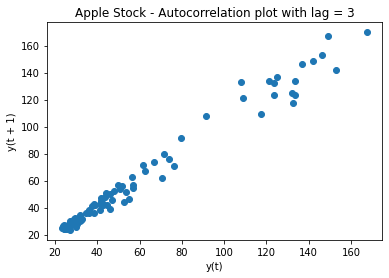

In [30]:
plt.figure()
lag_plot(df['Open'])
plt.title('Apple Stock - Autocorrelation plot with lag = 3')
plt.show()


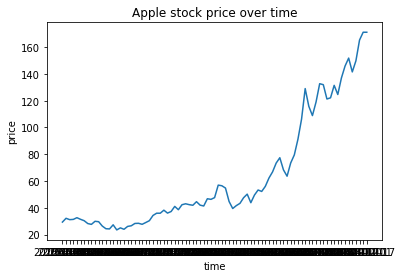

In [31]:
plt.plot(df["Date"], df["Close"])
#plt.xticks(np.arange(0,1259, 200), df['Date'][0:1259:200])
plt.title("Apple stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [32]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    fc,se,conf = model_fit.forecast()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(int(yhat))
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 97.34700626731917


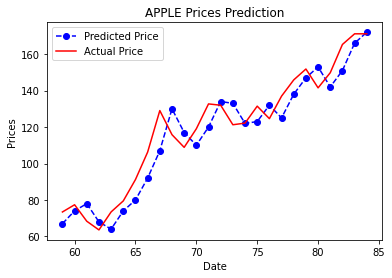

In [33]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('APPLE Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [34]:
print(output)

(array([172.84903512]), array([6.0328747]), array([[161.02481799, 184.67325225]]))


In [35]:
print(model_predictions)

[67, 74, 78, 68, 64, 74, 80, 92, 107, 130, 117, 110, 120, 134, 133, 122, 123, 132, 125, 138, 147, 153, 142, 151, 166, 172]


Pytesting

In [29]:
#last value of out dataset
actual_value=df['Close'].iloc[-1]
actual_value

171.139999

In [69]:
#chcecking our prediction
import pytest
start= actual_value - 5
end = actual_value + 5

def check():
  predict_value = model_predictions[-1]
  return (predict_value)

def test_pridict():
  assert (check() >= start and check() <= end)

print(test_pridict())

None


Acuuracy is **93 percent**

In [11]:
#Zara prediction

In [12]:
from google.colab import files 
uploaded = files.upload()

Saving zara dataset.csv to zara dataset.csv


In [13]:
import pandas as pd
df=pd.read_csv("zara dataset.csv", sep=",")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,29.389999,30.400000,28.000000,30.400000,26.273205,900
1,2015-02-01,28.750000,31.420000,28.280001,30.700001,26.532482,19900
2,2015-03-01,32.200001,33.299999,30.100000,32.700001,28.260983,21900
3,2015-04-01,32.700001,33.000000,32.200001,32.200001,27.828856,500
4,2015-05-01,32.200001,33.099998,30.900000,33.099998,28.606680,5000
...,...,...,...,...,...,...,...
67,2020-08-01,26.209999,28.629999,26.209999,27.850000,27.104036,125600
68,2020-09-01,27.090000,28.700001,26.850000,28.160000,27.405733,34300
69,2020-10-01,28.020000,29.160000,24.889999,24.889999,24.223320,46800
70,2020-11-01,24.520000,34.130001,24.520000,32.869999,32.486107,82900


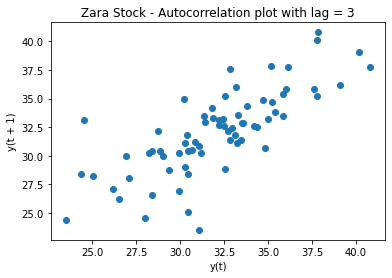

In [14]:
plt.figure()
lag_plot(df['Open'])
plt.title('Zara Stock - Autocorrelation plot with lag = 3')
plt.show()

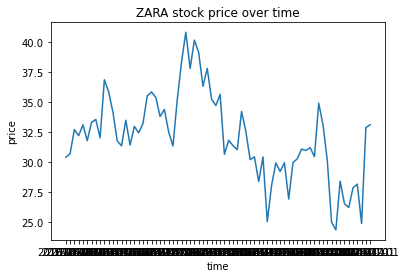

In [ ]:
plt.plot(df["Date"], df["Close"])
#plt.xticks(np.arange(0,1259, 200), data['Date'][0:1259:200])
plt.title("ZARA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(int(yhat))
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 9.073445963637273


In [ ]:
print(model_predictions)

[29, 29, 29, 26, 29, 30, 31, 30, 31, 30, 34, 33, 30, 24, 24, 28, 26, 26, 27, 28, 24, 32]


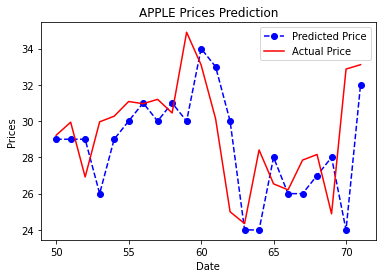

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('APPLE Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving ADDYY.csv to ADDYY.csv


In [ ]:
import pandas as pd
df=pd.read_csv("ADDYY.csv", sep=",")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,34.160000,35.250000,32.310001,34.540001,31.826502,2156700
1,2015-02-01,34.889999,39.650002,34.830002,38.959999,35.899265,3070700
2,2015-03-01,38.599998,40.150002,37.180000,39.549999,36.442913,1115800
3,2015-04-01,39.830002,42.000000,39.450001,41.099998,37.871143,1259100
4,2015-05-01,41.279999,42.889999,39.090000,39.110001,36.037487,1490300
...,...,...,...,...,...,...,...
79,2021-08-01,187.110001,199.440002,175.910004,177.500000,177.500000,1338600
80,2021-09-01,178.880005,179.479996,155.270004,158.119995,158.119995,1118400
81,2021-10-01,158.399994,166.389999,149.449997,163.710007,163.710007,1077500
82,2021-11-01,165.080002,173.020004,160.029999,161.050003,161.050003,594200


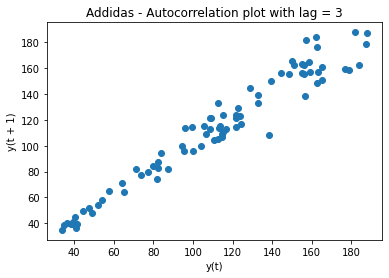

In [ ]:
plt.figure()
lag_plot(df['Open'])
plt.title('Addidas - Autocorrelation plot with lag = 3')
plt.show()

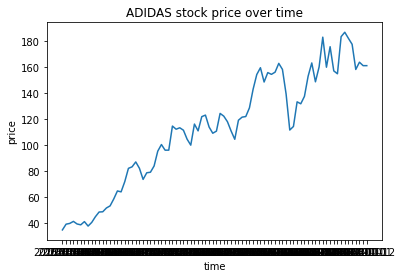

In [ ]:
plt.plot(df["Date"], df["Close"])
#plt.xticks(np.arange(0,1259, 200), data['Date'][0:1259:200])
plt.title("ADIDAS stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(int(yhat))
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 218.3180278769428


In [ ]:
print(model_predictions)

[156, 160, 164, 160, 141, 109, 123, 145, 131, 138, 153, 163, 144, 165, 184, 154, 186, 154, 163, 179, 187, 185, 175, 161, 172, 163]
